#### Find a linear model to fit three data points

If we have three data points

$$(x_1, y_1)=(3,5),\, (x_2, y_2)=(4,6),\, (x_3, y_3)=(1,4)$$

the linear model in matrix notation has the same form

$$y=A\theta$$

where

$$y=\begin{bmatrix} 5 \\ 6 \\ 4 \end{bmatrix},\, A=\begin{bmatrix} 3 & 1 \\ 4 & 1 \\ 1 & 1\end{bmatrix},\, \theta=\begin{bmatrix} a \\ b \end{bmatrix}$$

#### What about the `inverse`?

Since $A$ is a `non-square` matrix, we can no longer compute $A^{-1}$ directly to get $\theta$

$$\theta=A^{-1}y$$

Instead, the formula becomes

$$\theta=(A^TA)^{-1}A^Ty$$

$A^T$ is the `transpose` of $A$, where its rows become columns and columns become rows, for example

$$A^T=\begin{bmatrix} 3 & 4 & 1\\1 & 1 & 1 \end{bmatrix}$$

Since $A^TA$ is a square matrix, it is possible to take the inverse in this case

Based on the equation, we can use NumPy to compute $\theta$

#### Where does this equation come from?

In our case, for the two columns of

$$A=\begin{bmatrix} 3 & 1 \\ 4 & 1 \\ 1 & 1\end{bmatrix}$$

we can think them as two vectors (in 3D space). As long as they are not parallel, they can uniquely `define a plane` (in 3D space)

By multiplying $A$ with $\theta$, what we are doing is to `mix` these two vectors in a certain way and we call this new vector $y_{pred}$

$$y_{pred}=A\theta = a\begin{bmatrix} 3  \\ 4  \\ 1 \end{bmatrix}+b\begin{bmatrix}  1 \\ 1 \\ 1\end{bmatrix}$$

`More importantly`, this new vector $y_{pred}$ is still in the plane that is defined by the two columns of $A$

Intuitively, finding the `best` $\theta$ in our case is to find $\theta$ such that $y_{pred}$ is `closest` to $y$

Geometrically, we can think of finding a point $y_{pred}$ on the plane that is the closest to a given point $y$ (which, in our case, is not in the plane)

So, where is this point?

The answer is that it is the `projection` of $y$ onto the plane

This also means that the vector connecting $y$ and $y_{pred}$ must be `perpendicular` to any vector in that plane defined by the two columns of $A$, and therefore

$$y-A\theta \perp \begin{bmatrix} 3  \\ 4  \\ 1 \end{bmatrix}, \, y-A\theta \perp \begin{bmatrix}  1 \\ 1 \\ 1\end{bmatrix}$$

Using the property that if two vectors are perpendicular, their dot product is zero, we can write the above relationship as

$$A^T(y-A\theta)=\begin{bmatrix} 3 & 4 & 1\\1 & 1 & 1 \end{bmatrix}(y-A\theta)=\begin{bmatrix} \begin{bmatrix} 3 \\ 4 \\1   \end{bmatrix} \cdot (y-A\theta) \\ \begin{bmatrix} 1 \\ 1 \\1   \end{bmatrix} \cdot (y-A\theta)  \end{bmatrix}=\begin{bmatrix} 0\\0   \end{bmatrix}$$

Rearrange and we have the equation

$$A^Ty-A^TA\theta=0 \Rightarrow \theta = (A^TA)^{-1}A^Ty $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
plt.style.use('dark_background')

In [ ]:
A = np.array([[3, 1], [4, 1], [1, 1]])
y = np.array([5, 6, 4])

We use `np.linalg.inv(A)` to compute $(A^TA)^{-1}$

In [ ]:
theta = np.linalg.inv(A.T@A)@A.T@y
theta

array([ 0.6429,  3.2857])

Then, we make the plot

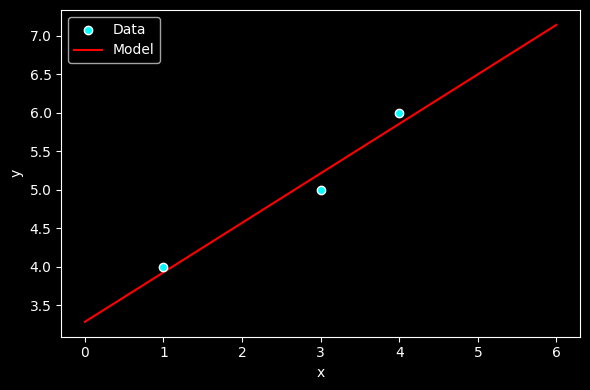

In [ ]:
def prediction(x, theta):
    return theta[0]*x + theta[1]

fig, ax=plt.subplots(figsize=(6,4))

plt.scatter(A[:,0], y, color='cyan', label='Data', edgecolors='w')
ax.plot([0,6],[prediction(0, theta), prediction(6, theta)],'r-', label='Model', zorder=-5)

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()
plt.legend()
plt.show()

We see the model `no longer passes through each data points`, since $y$ is not in the plane defined by the columns of $A$